In [2]:
"""
参考
https://qiita.com/inoory/items/088f719f2fd9a2ea4ee5
-> [Python]NetworkXでQiitaのタグ関係図を描く
"""
import requests
import json

items = []
params = {"page":1, "per_page":100}
for i in range(60):
    print("fetching... page " + str(i+1))
    params["page"] = i + 1
    res = requests.get("https://qiita.com/api/v2/items", params=params)
    items.extend(json.loads(res.text))

fetching... page 1
fetching... page 2
fetching... page 3
fetching... page 4
fetching... page 5
fetching... page 6
fetching... page 7
fetching... page 8
fetching... page 9
fetching... page 10
fetching... page 11
fetching... page 12
fetching... page 13
fetching... page 14
fetching... page 15
fetching... page 16
fetching... page 17
fetching... page 18
fetching... page 19
fetching... page 20
fetching... page 21
fetching... page 22
fetching... page 23
fetching... page 24
fetching... page 25
fetching... page 26
fetching... page 27
fetching... page 28
fetching... page 29
fetching... page 30
fetching... page 31
fetching... page 32
fetching... page 33
fetching... page 34
fetching... page 35
fetching... page 36
fetching... page 37
fetching... page 38
fetching... page 39
fetching... page 40
fetching... page 41
fetching... page 42
fetching... page 43
fetching... page 44
fetching... page 45
fetching... page 46
fetching... page 47
fetching... page 48
fetching... page 49
fetching... page 50
fetching.

In [45]:
tags_list = []
for item in items:
    tags = [tag["name"] for tag in item["tags"]]
    tags_list.append(tags)

In [46]:
import collections
import itertools

tag_count = collections.Counter(itertools.chain.from_iterable(tags_list)).most_common(50)

In [47]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([(tag, {"count":count}) for tag,count in tag_count])

In [48]:
for tags in tags_list:
    for node0,node1 in itertools.combinations(tags, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            #G.edge[node0][node1]["weight"] += 1
            G[node0][node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, weight=1)

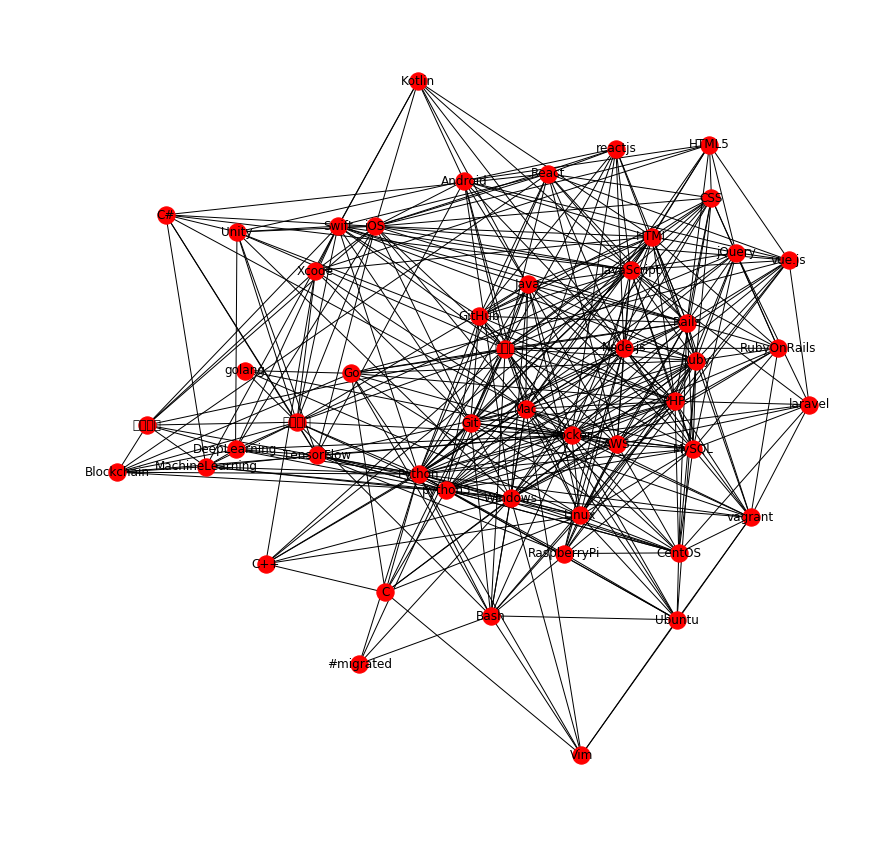

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)

plt.axis("off")
plt.savefig("default.png")
plt.show()

In [50]:
for (u,v,d) in list(G.edges(data=True)):
    #print(u)
    if d["weight"] <= 4:
        G.remove_edge(u, v)

In [51]:
pos = nx.spring_layout(G, k=0.3)

{'#migrated': <matplotlib.text.Text at 0x1082d8ba8>,
 'AWS': <matplotlib.text.Text at 0x10ffec128>,
 'Android': <matplotlib.text.Text at 0x10ffe2ba8>,
 'Bash': <matplotlib.text.Text at 0x1082e1668>,
 'Blockchain': <matplotlib.text.Text at 0x1082ee0b8>,
 'C': <matplotlib.text.Text at 0x1082dbba8>,
 'C#': <matplotlib.text.Text at 0x10ffe2668>,
 'C++': <matplotlib.text.Text at 0x11000f128>,
 'CSS': <matplotlib.text.Text at 0x11000fba8>,
 'CentOS': <matplotlib.text.Text at 0x10ffe2128>,
 'DeepLearning': <matplotlib.text.Text at 0x10733df28>,
 'Git': <matplotlib.text.Text at 0x1082e1ba8>,
 'GitHub': <matplotlib.text.Text at 0x110866668>,
 'Go': <matplotlib.text.Text at 0x110001668>,
 'HTML': <matplotlib.text.Text at 0x110001ba8>,
 'HTML5': <matplotlib.text.Text at 0x10ffecba8>,
 'Java': <matplotlib.text.Text at 0x110001128>,
 'JavaScript': <matplotlib.text.Text at 0x110866128>,
 'Kotlin': <matplotlib.text.Text at 0x1082db128>,
 'Linux': <matplotlib.text.Text at 0x11000f668>,
 'Mac': <matplo

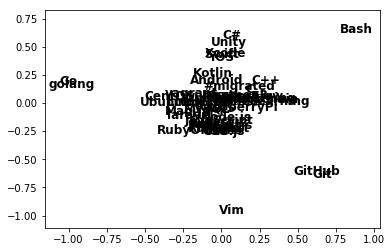

In [56]:
node_size = [ d["count"]*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color="w",alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="sans-serif", font_weight="bold")

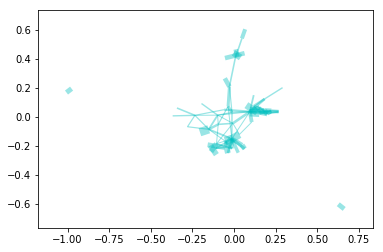

In [57]:
edge_width = [ d["weight"]*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="c", width=edge_width)

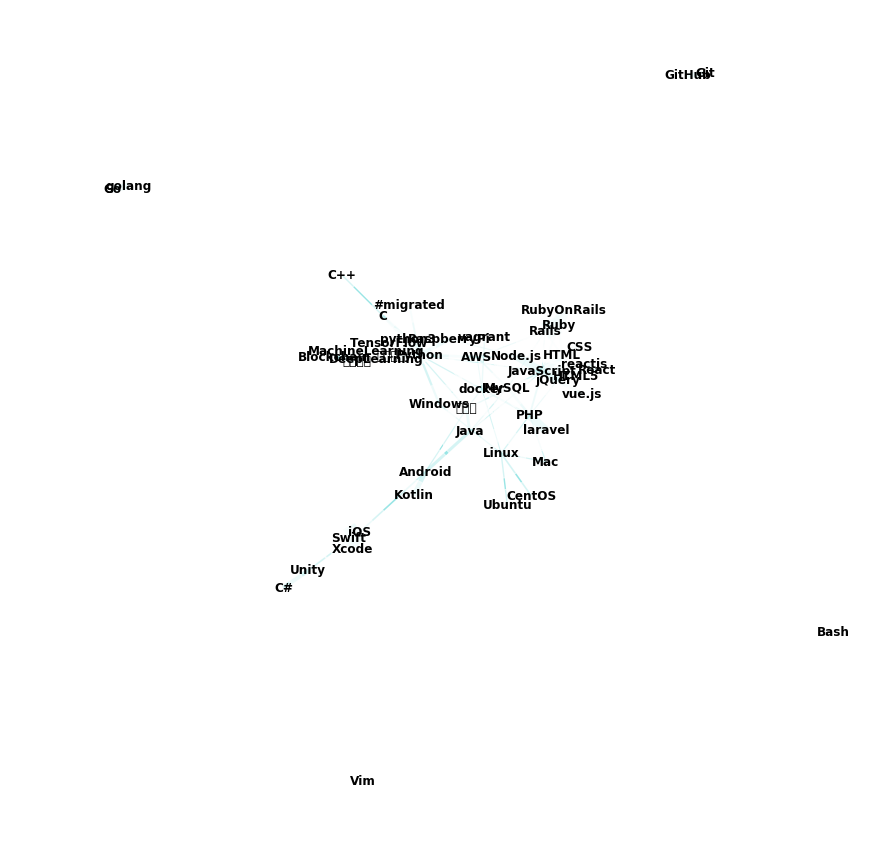

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

for (u,v,d) in G.edges(data=True):
    if d["weight"] <= 4:
        G.remove_edge(u, v)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.3)

node_size = [ d['count']*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='w',alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="sans-serif", font_weight="bold")

edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

plt.axis('off')
plt.savefig("g2.png")
plt.show()